In [1]:
# A használt könyvtárak beolvasása
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
#from collections import Counter

In [2]:
# Az adatkészletek beolvasása
train_data = pd.read_csv('modified_train.csv', delimiter=',', nrows = 100000)
test_data=pd.read_csv('modified_test.csv', delimiter=',')

In [3]:
# A tanuló adatok leírása
train_data.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,63078.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,9.10014,2.637850,84.531040,311.630930,28465.223540,1897.609161,195700.878390,0.138030,0.260470,5.760540,...,0.325160,1.112700,14511.034340,2.590540,0.08270,1.477770,3.206530,80.972620,597.559610,49.74576
std,12.09091,0.751001,54.320574,209.399151,16822.922817,2123.885180,110173.879786,0.344933,0.438893,3.771156,...,0.722341,0.441928,11043.082364,2.160456,0.27543,1.197163,1.624119,55.679861,507.624672,28.95063
min,2.00000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2.00000,3.000000,66.000000,174.000000,13914.000000,290.528875,107548.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,8267.000000,1.000000,0.00000,1.000000,2.000000,50.000000,160.000000,25.00000
50%,2.00000,3.000000,66.000000,311.000000,27733.000000,1093.888450,181983.000000,0.000000,0.000000,9.000000,...,0.000000,1.000000,11271.000000,1.000000,0.00000,1.000000,2.000000,50.000000,585.000000,49.00000
75%,11.00000,3.000000,69.000000,385.000000,43113.000000,2518.177400,301357.000000,0.000000,1.000000,9.000000,...,0.000000,1.000000,18881.000000,5.000000,0.00000,2.000000,4.000000,106.000000,701.000000,73.00000
max,53.00000,4.000000,239.000000,1025.000000,56495.000000,11641.224200,391007.000000,1.000000,1.000000,10.000000,...,9.000000,8.000000,65035.000000,9.000000,1.00000,59.000000,6.000000,212.000000,2117.000000,99.00000


In [4]:
# A tesztelő adatok leírása
test_data.describe()

,id,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
count,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,1.680782e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06
mean,1.264121e+06,9.709666e+00,2.697413e+00,8.551612e+01,3.170341e+02,2.786218e+04,1.686398e+03,6.026459e+05,1.425978e-01,1.093253e-01,6.493726e+00,1.958127e+00,2.507413e-01,1.117410e+00,1.656862e+04,2.941702e+00,3.022615e+00,8.125454e+01,6.464926e+02
std,7.298410e+05,1.227183e+01,7.651288e-01,5.673880e+01,2.082834e+02,1.668788e+04,2.197361e+03,3.469651e+05,3.496623e-01,3.120470e-01,3.931422e+00,8.980415e-01,6.754566e-01,4.615010e-01,1.280502e+04,2.282006e+00,1.674879e+00,5.507528e+01,5.046530e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.320605e+05,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.354200e+04,2.080691e+02,3.020785e+05,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,8.267000e+03,1.000000e+00,2.000000e+00,5.000000e+01,2.750000e+02
50%,1.264121e+06,2.000000e+00,3.000000e+00,6.600000e+01,3.180000e+02,2.765500e+04,7.278764e+02,6.041940e+05,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.201200e+04,1.000000e+00,2.000000e+00,5.000000e+01,6.280000e+02
75%,1.896182e+06,1.300000e+01,3.000000e+00,6.900000e+01,3.980000e+02,4.232800e+04,2.222729e+03,9.038295e+05,0.000000e+00,0.000000e+00,1.000000e+01,2.000000e+00,0.000000e+00,1.000000e+00,2.354100e+04,6.000000e+00,4.000000e+00,1.050000e+02,7.830000e+02
max,2.528242e+06,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650900e+04,1.220623e+04,1.198785e+06,1.000000e+00,1.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,8.000000e+00,6.578000e+04,9.000000e+00,6.000000e+00,2.120000e+02,2.117000e+03


In [5]:
len(test_data)

2528243

In [6]:
len(train_data)

100000

36922
71
71


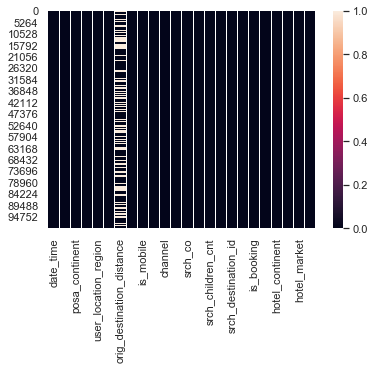

In [7]:
# Nan értékek száma az oszlopokban
sns.heatmap(train_data.isnull())
plt.savefig("nan_columns.jpg")

# Nan értékek pontos száma
print(sum(pd.isnull(train_data['orig_destination_distance'])))
print(sum(pd.isnull(train_data['srch_ci'])))
print(sum(pd.isnull(train_data['srch_co'])))

847461
21
17


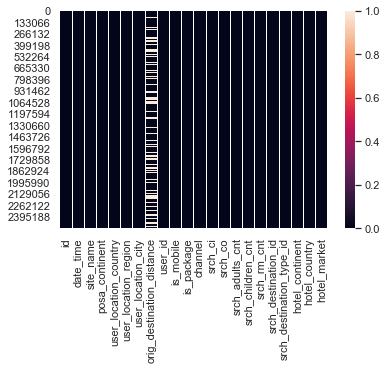

In [7]:
# Nan értékek száma az oszlopokban
sns.heatmap(test_data.isnull())
plt.savefig("test_nan_columns.jpg")

# Nan értékek pontos száma
print(sum(pd.isnull(test_data['orig_destination_distance'])))
print(sum(pd.isnull(test_data['srch_ci'])))
print(sum(pd.isnull(test_data['srch_co'])))

In [16]:
# Összegzése a foglalt éjszakák számának
for i in range(1,191):
    d = Counter(train_data['stay_duration_day'])
    if(d[i] != 0):
        print(i, ": ", d[i])
print(sum(pd.isnull(train_data['stay_duration_day'])))

1 :  24931
2 :  19495
3 :  17019
4 :  11593
5 :  6673
6 :  4503
7 :  5786
8 :  1812
9 :  1024
10 :  928
11 :  524
12 :  407
13 :  339
14 :  769
15 :  127
16 :  57
17 :  65
18 :  15
19 :  51
20 :  68
21 :  74
22 :  14
23 :  3
24 :  3
25 :  9
26 :  15
27 :  12
28 :  25
29 :  5
30 :  13
31 :  11
32 :  4
33 :  2
34 :  4
35 :  3
36 :  1
37 :  1
39 :  1
41 :  2
42 :  1
44 :  1
48 :  2
57 :  1
62 :  2
190 :  1
3604


Foglalások száma:	 7656
Keresések száma:	 88811


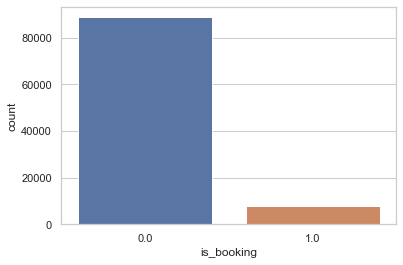

In [17]:
print("Foglalások száma:\t", len(train_data[train_data['is_booking'].isin([1])])) #történt foglalás
print("Keresések száma:\t", len(train_data[train_data['is_booking'].isin([0])])) #csak keresés történt

sns.countplot(train_data['is_booking'])
plt.savefig('is_booking.jpg')

Telefonos keresések:	 12851
Egyéb keresések:	 83616


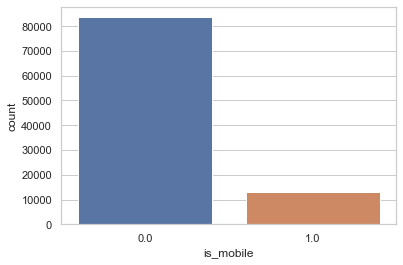

In [18]:
print("Telefonos keresések:\t", len(train_data[train_data['is_mobile'].isin([1])])) #telefonról történő keresés
print("Egyéb keresések:\t", len(train_data[train_data['is_mobile'].isin([0])])) #nem telefonról történő keresés

sns.countplot(train_data['is_mobile'])
plt.savefig('is_mobile.jpg')

Csomagban történő foglalás/keresés:	 25459
Nem csomagban történő foglalás/keresés:	 71008


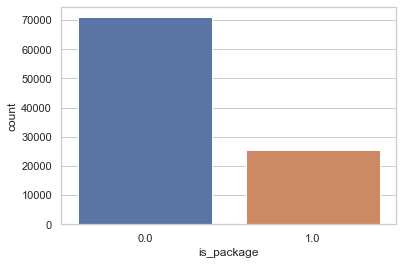

In [19]:
print("Csomagban történő foglalás/keresés:\t", len(train_data[train_data['is_package'].isin([1])])) #csomagban történt foglalás/keresés
print("Nem csomagban történő foglalás/keresés:\t", len(train_data[train_data['is_package'].isin([0])])) #nem csomagban történt foglalás/keresés

sns.countplot(train_data['is_package'])
plt.savefig('is_package.jpg')

In [ ]:
plt.figure(figsize=(50,20))

for x in train_data.columns:
    if x not in ['date_time', 'orig_destination_distance', 'srch_ci', 'srch_co', 'is_package', 'is_mobile', 'is_booking']:
        print(x + '\n')
        sns.countplot(train_data[x], palette="Set2")
        plt.savefig("{name}.jpg".format(name=x))

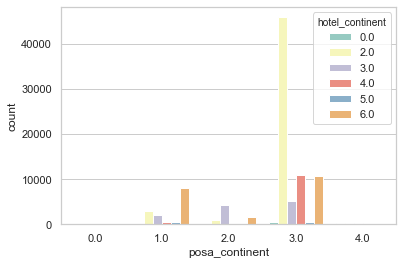

In [20]:
sns.countplot('posa_continent', hue='hotel_continent',data=train_data ,palette="Set3")
plt.savefig("posa_continent X hotel_continent.jpg")

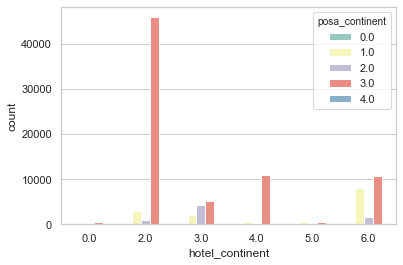

In [21]:
sns.countplot('hotel_continent', hue='posa_continent',data=train_data ,palette="Set3")
plt.savefig("hotel_continent X posa_continent.jpg")

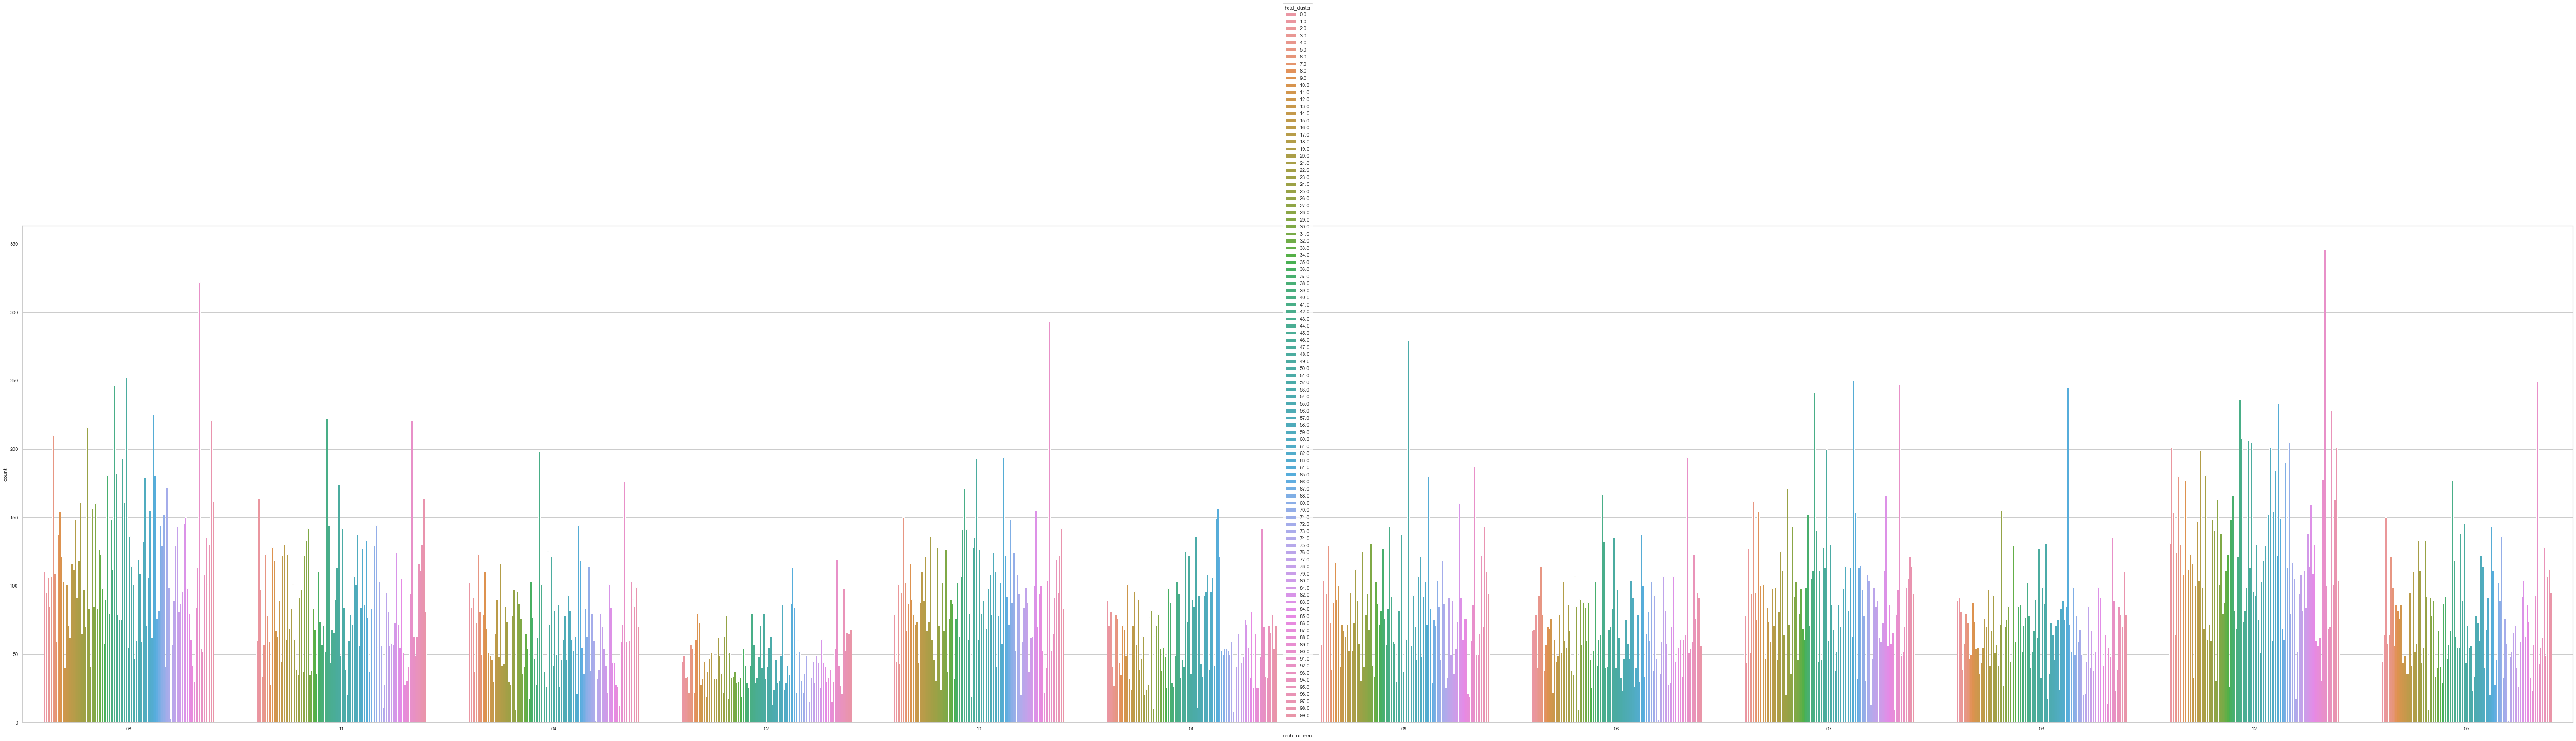

In [22]:
plt.figure(figsize=(100, 20))
sns.countplot('srch_ci_mm', hue='hotel_cluster',data=train_data)
plt.savefig("srch_ci_mm X hotel_cluster.jpg")

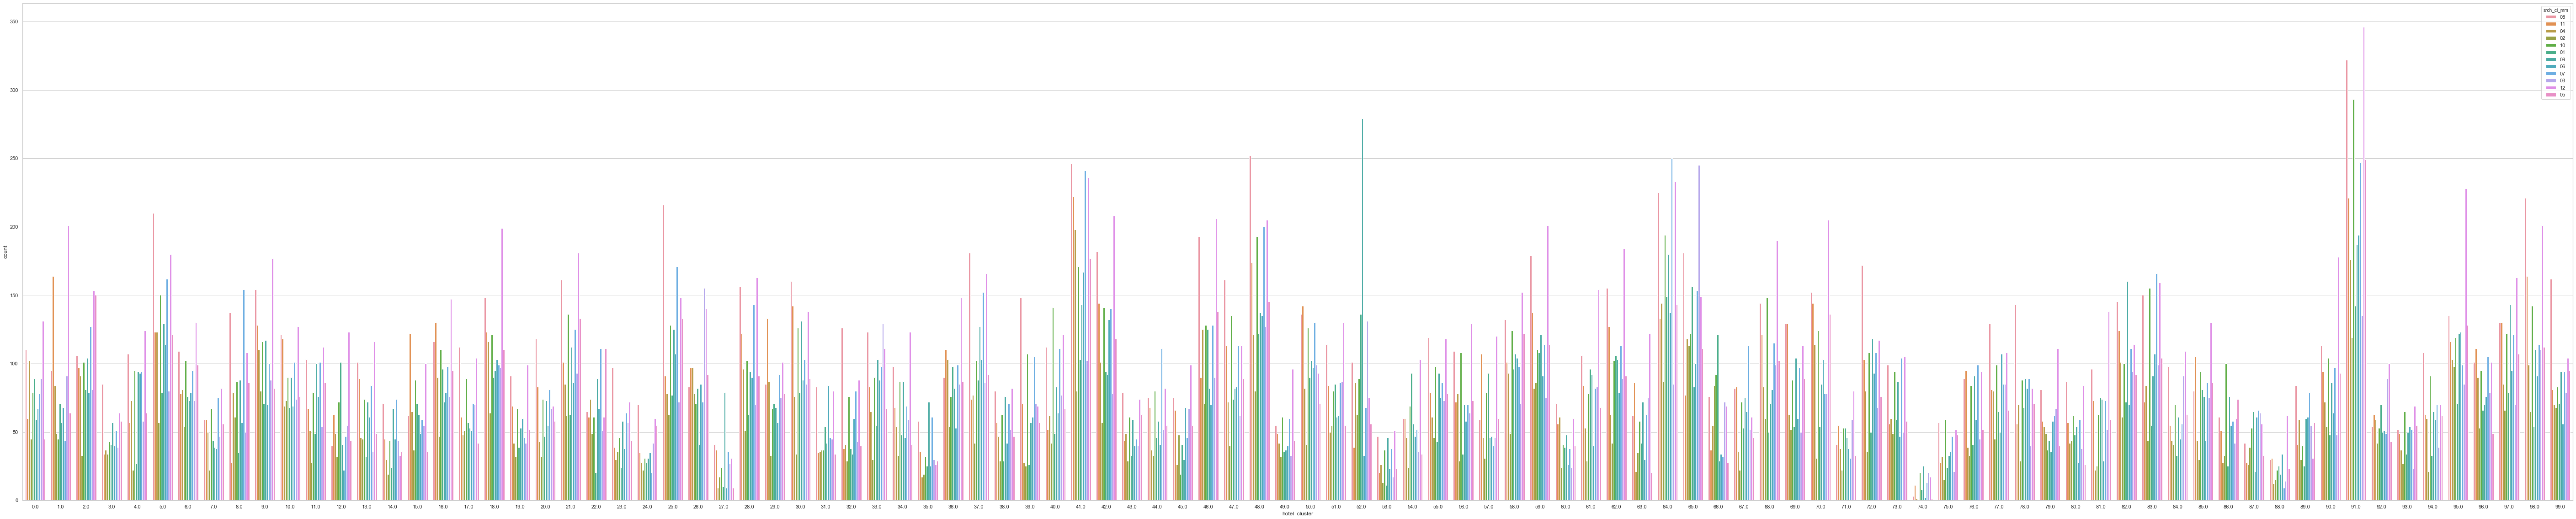

In [23]:
plt.figure(figsize=(100, 20))
sns.countplot('hotel_cluster', hue='srch_ci_mm',data=train_data)
plt.savefig("hotel_cluster X srch_ci_mm.jpg")

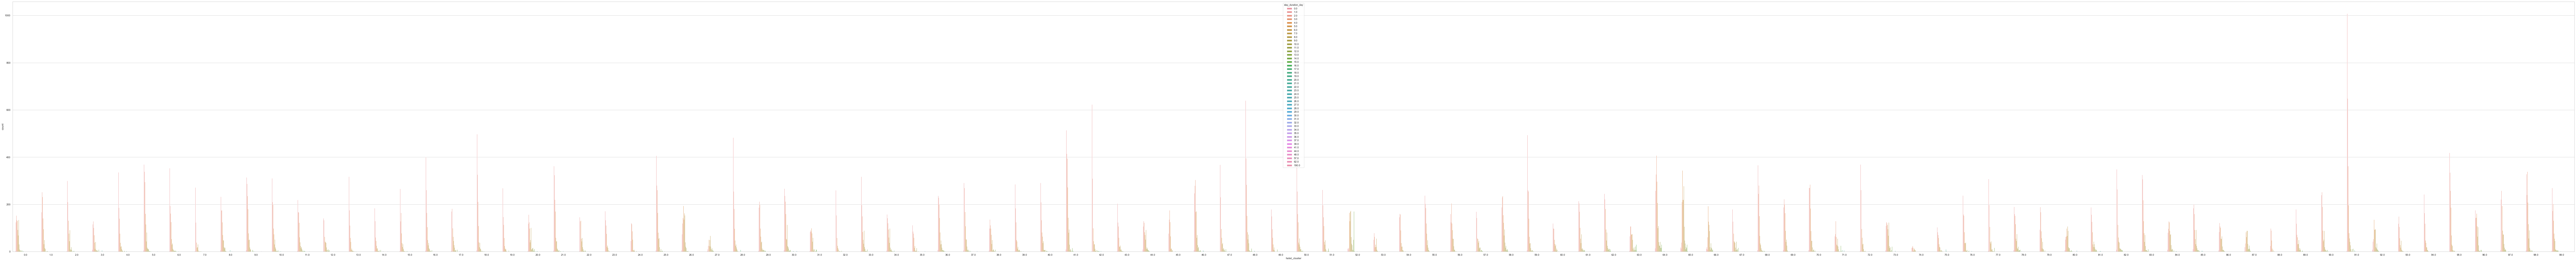

In [14]:
plt.figure(figsize=(200, 20))
sns.countplot('hotel_cluster', hue='stay_duration_day',data=train_data)
plt.savefig("stay_duration_day X hotel_cluster.jpg")

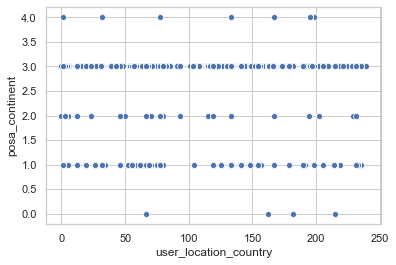

In [24]:
sns.scatterplot(train_data['user_location_country'],train_data['posa_continent'])

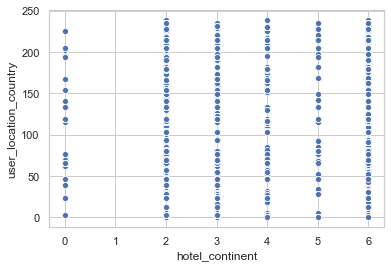

In [25]:
sns.scatterplot(train_data['hotel_continent'],train_data['user_location_country'])

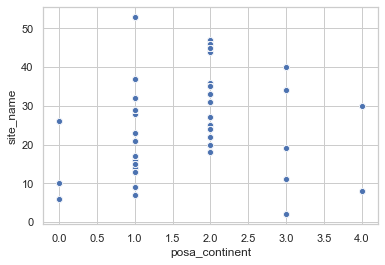

In [26]:
sns.scatterplot(train_data['posa_continent'],train_data['site_name'])

In [27]:
#maximum előforduló adatok keresése
#train['Cin_day'].value_counts() = 26
#train['Cin_month'].value_counts() = 8
#train['Cin_year'].value_counts() = 2014
#train['stay_dur'].value_counts() = 1
#train['no_of_days_bet_booking'].value_counts() = 0

In [31]:
train_data['srch_ci_day'] = train_data['srch_ci_day'].fillna(train_data['srch_ci_day'].value_counts())
train_data['srch_ci_mm'] = train_data['srch_ci_mm'].fillna(train_data['srch_ci_mm'].value_counts())
train_data['srch_ci_year'] = train_data['srch_ci_year'].fillna(train_data['srch_ci_year'].value_counts())
train_data['stay_duration_day'] = train_data['stay_duration_day'].fillna(train_data['stay_duration_day'].value_counts())
train_data['no_of_days_bet_booking'] = train_data['search_duration_day'].fillna(train_data['search_duration_day'].value_counts())

In [ ]:
train_data['orig_destination_distance'].fillna(train_data['orig_destination_distance'].mean(), inplace=True)